In [1]:
# import the necessary packages
from __future__ import print_function
import imutils  
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # for image display
from io import BytesIO
import os, PIL
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
from google.colab import files

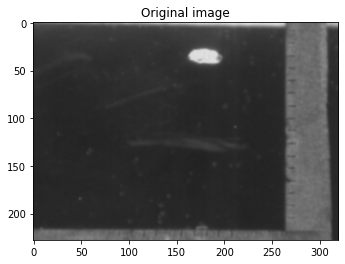

In [2]:
# read image
img=cv2.imread('frame_300.jpg')
# Gaussian blurring to remove noise 
img = cv2.GaussianBlur(img, (3,3), 0)
# convert from BGR to RGB
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
# display image
plt.title('Original image')
plt.imshow(img)

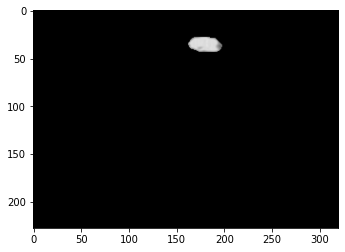

In [4]:
# EXTRACT BUBBLE
# set up initial mask
mask=np.zeros(img.shape[:2],np.uint8)
# define background for grabCut
bgdModel = np.zeros((1,65),np.float64)
# define foreground for grabCut
fgdModel = np.zeros((1,65),np.float64)
# define rectangle (x,y,w,h) for grabCut 
rect = (128,4,102,202)
# apply grabcut
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
# generate new mask from iterated mask
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
# segment the image to extract bubble
img_nobg = img*mask2[:,:,np.newaxis]
# plot image of bubble
plt.imshow(img_nobg)

# CALCULATE DIAMETER
# convert bubble to gray
gray=cv2.cvtColor(img_nobg,cv2.COLOR_BGR2GRAY)
# identify non-black pixels
cntNotBlack = cv2.countNonZero(gray)
# define area as non-black pixels
area=cntNotBlack
# calculate diameter
diam=2*np.sqrt((2*area)/np.pi)

# EXTRACT AND SAVE BACKGROUND
# extract background w/o bubble
img_bg=img-img_nobg
# save bubble-less background
out=Image.fromarray(img_bg,mode="RGB")
out.save('bg300.jpg')

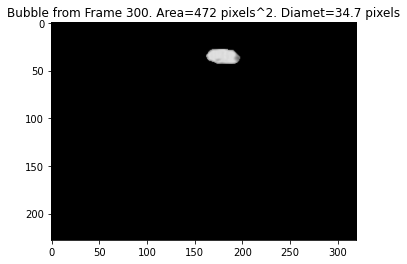

In [5]:
#plt.subplot(121)
plt.title("Bubble")
plt.title(f"Bubble from Frame 300. Area={area} pixels^2. Diamet={np.round(diam,1)} pixels")
plt.imshow(img_nobg)

In [ ]:
allfiles=['bg300.jpg','bg307.jpg','bg318.jpg','bg326.jpg']
average_bubbleless_backgrounds(allfiles)